In [17]:
import numpy as np
import pandas
import pickle

In [3]:
with open('file.p','rb') as f:
    arr = pickle.load(f)

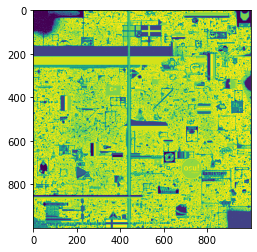

In [4]:
import matplotlib.pyplot as plt

plt.imshow(arr[0])

In [5]:
left = arr[:-1]
right = arr[1:]
diff = left-right

print(diff.shape)

(3021, 1000, 1000)


In [6]:
#changed = diff == 0

In [7]:
np.any(a)

array([[[-10,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,  31,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   7,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   4]],

       [[-19,  15,   0, ...,   0,   0, -25],
        [ 15,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  2,  14,  -4, ...,   0,   0,   0],
        [ -8,  -5,   0, ...,   0, -25,  -9]],

       [[ 29, -26,   0, ...,   0,   0,   9],
        [  0, -10,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0, -21,   0],
        [  2,  19,   0, ...,   0,  25,   9]],

       ...,

       [[ -2,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [8]:
diff.shape

(3021, 1000, 1000)

In [27]:
sample = diff[:100]
changes = sample == 0
n_updates = changes.sum(axis=0)

In [ ]:
below_cutoff = n_updates < 80


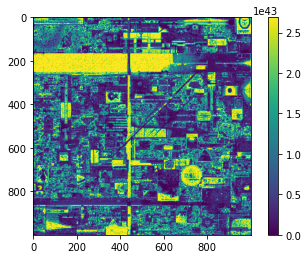

In [31]:
plt.imshow(np.exp(n_updates))
plt.colorbar()
plt.show()

(array([2.00000e+00, 0.00000e+00, 4.00000e+00, 4.00000e+00, 1.50000e+01,
        4.70000e+01, 1.26000e+02, 5.13000e+02, 3.07700e+03, 9.96212e+05]),
 array([ 46. ,  71.4,  96.8, 122.2, 147.6, 173. , 198.4, 223.8, 249.2,
        274.6, 300. ]),
 <BarContainer object of 10 artists>)

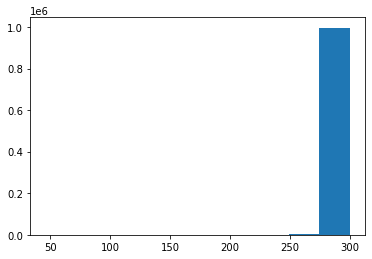

In [19]:
plt.hist(n_updates.flatten())